
<!DOCTYPE doctype html>

<!--[if lt IE 7]> <html class="ie6 oldie" lang="en"> <![endif]-->
<!--[if IE 7]> <html class="ie7 oldie" lang="en"> <![endif]-->
<!--[if IE 8]> <html class="ie8 oldie" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en"> <!--<![endif]-->
<head>
<title>Skincare Ingredient Dictionary | Paula's Choice</title>
<meta content="https://www.paulaschoice.com/on/demandware.store/Sites-paulaschoice_us-Site/en_US/Search-ShowContent?fdid=ingredient-dictionary" property="og:url"/>
<meta content="Skincare Ingredient Dictionary | Paula's Choice" property="og:title"/>
<meta content="" property="og:description"/>
<meta content="https://www.paulaschoice.com/on/demandware.static/-/Library-Sites-paulachoice/en_US/v1636059718805/_resources/www/_system/content/facebook-share-generic.jpg" property="og:image"/>
<meta content="summary" name="twitter:card"/>
<meta content="https://www.paulaschoice.com/on/demandware.store/Sites-paulaschoice_us-Site/en_US/Search-ShowContent?fdi
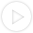

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.paulaschoice.com/ingredient-dictionary"
page = requests.get(url)

soup = BeautifulSoup(page.content, "html.parser")
soup

In [6]:
results = soup.find("div", class_="page-content-result")
print(results.prettify())

<div class="page-content-result" data-content-type="ingredients">
 <div class="wl-ingredientlist" data-searched-count="1850">
  <table class="base">
   <thead>
    <tr>
     <th class="col-rating">
      Rating
      <i class="icon-sort">
      </i>
     </th>
     <th class="col-ingredient">
      Ingredient
      <i class="icon-sort">
      </i>
     </th>
    </tr>
   </thead>
   <tbody>
    <tr class="ingredient-result">
     <td class="col-rating ingredient-rating rating-good">
      Good
     </td>
     <td class="col-ingredient ingredient-info">
      <h2 class="name ingredient-name">
       <a href="https://www.paulaschoice.com/ingredient-dictionary/preservatives/1%2C-2-hexanediol.html?fdid=ingredient-dictionary&amp;csortb1=name&amp;csortd1=1">
        1, 2-Hexanediol
       </a>
      </h2>
      <p class="description ingredient-description">
       A preservative belonging to a class of agents known as higher molecular glycols.
      </p>
      <div class="categories ingredie

In [22]:
content = results.find_all("tr", class_="ingredient-result")
content[0].find("div").text.strip().replace("\n", " ")

'Categories: Preservatives'

In [25]:
ingredients = {}
for i in range(len(content)):
    temp = {}
    temp['name'] = content[i].find("h2").text.strip()
    desc = content[i].find("p")
    if desc != None:
        temp['description'] = desc.text.strip()
    else:
        temp['description'] = ""
    temp['categories'] = content[i].find("div").text.strip().replace("\n", " ")
    ingredients[i] = temp

In [37]:
df = pd.DataFrame(ingredients).transpose()
df.head()

,categories,description,name
0,Categories: Preservatives,A preservative belonging to a class of agents ...,"1, 2-Hexanediol"
1,Categories: Emollients,A synthetic ingredient that functions as a ski...,10-Hydroxydecanoic Acid
2,"Categories: Emollients, Skin-Soothing",A synthetic fatty alcohol that functions as an...,4-T-butylcyclohexanol
3,"Categories: Plant Extracts, Fragrance: Synthet...",A fragrant extract from a type of acacia tree....,Acacia farnesiana extract
4,"Categories: Texture Enhancer, Plant Extracts, ...",Used in various capacities to enhance the smoo...,acacia senegal gum


array([['Categories: Preservatives',
        'A preservative belonging to a class of agents known as higher molecular glycols.',
        '1, 2-Hexanediol'],
       ['Categories: Emollients',
        'A synthetic ingredient that functions as a skin-conditioning and occlusive agent.',
        '10-Hydroxydecanoic Acid'],
       ['Categories: Emollients, Skin-Soothing',
        'A synthetic fatty alcohol that functions as an emollient and soothing agent...',
        '4-T-butylcyclohexanol'],
       ...,
       ['Categories: Skin-Soothing, Plant Extracts, Sensitizing', '',
        'Zingiber officinale roscoe'],
       ['Categories: Skin-Soothing, Plant Extracts, Sensitizing', '',
        'Zingiber zerumbet'],
       ['Categories: Skin-Soothing, Plant Extracts', '',
        'Zizyphus jujuba fruit extract']], dtype=object)